In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# conda install -c districtdatalabs yellowbrick

In [3]:
import tensorflow as tf

In [4]:
#!pip install nltk
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')

# Read the CSV

In [5]:
data= pd.read_csv("mtsamples 4.csv", index_col=[0])
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [7]:
del data['keywords']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [9]:
data.isnull().sum()

description           0
medical_specialty     0
sample_name           0
transcription        33
dtype: int64

In [10]:
data= data.dropna(axis = 0, how ='any') 
data.sample(5)

,description,medical_specialty,sample_name,transcription
3287,"History of diabetes, osteoarthritis, atrial f...",General Medicine,H&P - Gen Med - 2,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
2592,Exam under anesthesia. Removal of intrauteri...,Obstetrics / Gynecology,Intrauterine Clots Removal,"PREOPERATIVE DIAGNOSIS: , Postpartum hemorrhag..."
1909,Template for History and Physical for a newborn.,Pediatrics - Neonatal,Normal Newborn H&P Template,"HISTORY OF PRESENT ILLNESS: , This is a ** wee..."
4934,Flexible Bronchoscopy (pediatric),Cardiovascular / Pulmonary,Bronchoscopy - Pediatric,"FLEXIBLE BRONCHOSCOPY,The flexible bronchoscop..."
3838,"Head injury, anxiety, and hypertensive emerge...",Emergency Room Reports,Head Injury,"CHIEF COMPLAINT:, Head injury.,HISTORY: , Thi..."


In [11]:
data.isnull().sum()

description          0
medical_specialty    0
sample_name          0
transcription        0
dtype: int64

In [12]:
data['transcription']=data['transcription'].astype('str')
data['transcription']

0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [13]:
data['transcription'] = data['transcription'].str.lower()
data['transcription']

0       subjective:,  this 23-year-old white female pr...
1       past medical history:, he has difficulty climb...
2       history of present illness: , i have seen abc ...
3       2-d m-mode: , ,1.  left atrial enlargement wit...
4       1.  the left ventricular cavity size and wall ...
                              ...                        
4994    history:,  i had the pleasure of meeting and e...
4995    admitting diagnosis: , kawasaki disease.,disch...
4996    subjective: , this is a 42-year-old white fema...
4997    chief complaint: , this 5-year-old male presen...
4998    history: , a 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [14]:
# data['transcription'].replace(['#'], [' '], regex=True)

In [15]:
#getting rid of targeted charachters in the trascription
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c,"")

data.sample(5)

# chars = "\`*_{}[]()>#+-.,!$:;%'&/?"

,description,medical_specialty,sample_name,transcription
2870,Headache. Right frontal lobe glioma.,Neurology,Glioma - 2,"cc headache,hxy/o rhf presented to her local p..."
780,Cellulitis with associated abscess and foreig...,Surgery,Foreign Body Removal - Foot - 1,preoperative diagnoses cellulitis with associa...
3432,A 2-month-old female with 1-week history of c...,General Medicine,Congestion & Fever - 2-month-old,chief complaint a 2-month-old female with 1-w...
1645,Patient with a past medical history of a left...,Radiology,EMG/Nerve Conduction Study - 6,history the patient is a 46-year-old right-ha...
4938,Plastic piece foreign body in the right main...,Cardiovascular / Pulmonary,Bronchoscopy & Foreign Body Removal,preoperative diagnosis foreign body in airway....


In [16]:
#getting rid of targeted charachters in the trascription
chars = [",", ".", "[", "]", ":", "``", ")", "(", "1", "2", "5", "%", "3", "4", "4-0", "3-0", "6", "''", "0", "2-0", "8", "7", "&", "5-0", "9", "0.5", "1.5", "500", "50", "100", "6-0", "15", "2.5", "14-15", "60", "'", "300", "14", "________", "7-0", "90", "__________", "3.5", "1:100,000", "70", "0.", "80", "1:50,000", "03/08/200 ", "03/09/2007", "25605", "7.314", "33.0", "855.", "08/22/03", "10/500", "125.", "144/6"]
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c," ")

data.sample(5)


,description,medical_specialty,sample_name,transcription
1983,Knee injection,Pain Management,Knee Injection,the patient was told that the injection may ca...
69,"The patient is a 16-month-old boy, who had a ...",Urology,Penile Cellulitis,chief complaint penile cellulitis status po...
757,"Removal of painful hardware, first left metat...",Surgery,Hardware Removal - Metatarsal,title of operation removal of painful hardware...
4546,"Left buttock abscess, status post incision an...",Consult - History and Phy.,Buttock Abscess,chief complaint buttock abscess history of pr...
1946,"1+ year, black female for initial evaluation ...",Pediatrics - Neonatal,Atopic Eczema,subjective this year black female new patie...


In [17]:
# Tokenizing 
from nltk.tokenize import word_tokenize

data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents
1464,Followup of moderate-to-severe sleep apnea. ...,Sleep Medicine,Sleep Apnea,reason for visit mr abc is a -year-old man ...,"[reason, for, visit, mr, abc, is, a, -year-old..."
4028,"Removal of cystic lesion, removal of teeth, m...",Dentistry,Teeth Extraction,preoperative diagnoses basal cell nevus syndr...,"[preoperative, diagnoses, basal, cell, nevus, ..."
3640,Colonoscopy to screen for colon cancer,Gastroenterology,Colonoscopy - 6,indications this is a -year-old female who i...,"[indications, this, is, a, -year-old, female, ..."
502,Left facial cellulitis and possible odontogen...,Surgery,Odontogenic Abscess I&D,preoperative diagnoses left facial cellulitis ...,"[preoperative, diagnoses, left, facial, cellul..."
3569,The patient was brought to the OR with the kn...,Gastroenterology,Endovascular Abdominal Aortic Aneurysm Repair,preoperative diagnosis abdominal aortic aneury...,"[preoperative, diagnosis, abdominal, aortic, a..."


In [18]:
# data["tokenized_sents"] = data["tokenized_sents"].astype('str')

In [19]:
data["tokenized_sents"][0][0]

'subjective'

In [20]:
from nltk import pos_tag

In [21]:
nltk.tag.pos_tag(data["tokenized_sents"][0])

[('subjective', 'NN'),
 ('this', 'DT'),
 ('-year-old', 'JJ'),
 ('white', 'JJ'),
 ('female', 'NN'),
 ('presents', 'NNS'),
 ('with', 'IN'),
 ('complaint', 'NN'),
 ('of', 'IN'),
 ('allergies', 'NNS'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('allergies', 'NNS'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('lived', 'VBD'),
 ('in', 'IN'),
 ('seattle', 'NN'),
 ('but', 'CC'),
 ('she', 'PRP'),
 ('thinks', 'VBZ'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('worse', 'JJR'),
 ('here', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('past', 'JJ'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('tried', 'VBN'),
 ('claritin', 'NN'),
 ('and', 'CC'),
 ('zyrtec', 'NN'),
 ('both', 'DT'),
 ('worked', 'VBD'),
 ('for', 'IN'),
 ('short', 'JJ'),
 ('time', 'NN'),
 ('but', 'CC'),
 ('then', 'RB'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('lose', 'VB'),
 ('effectiveness', 'NN'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('used', 'VBN'),
 ('allegra', 'NN'),
 ('also', 'RB'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('that', 'IN'),
 (

In [22]:
data['POSTags'] = data['tokenized_sents'].apply(pos_tag)

In [23]:
data['POSTags'].head()

0    [(subjective, NN), (this, DT), (-year-old, JJ)...
1    [(past, JJ), (medical, JJ), (history, NN), (he...
2    [(history, NN), (of, IN), (present, JJ), (illn...
3    [(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...
4    [(the, DT), (left, NN), (ventricular, JJ), (ca...
Name: POSTags, dtype: object

In [24]:
# type(data['POSTags'].to_list())

In [25]:
# test =data['POSTags'].to_list()
# type(test)


In [26]:
# from yellowbrick.text import PosTagVisualizer

# # Create the visualizer, fit, score, and show it
# viz = PosTagVisualizer()
# viz.fit(test[0])
# viz.show()

In [27]:
# Selecting the nouns in our corpus
data['Nouns'] = data['POSTags'].apply(lambda x: [(t[0], t[1]) for t in x if t[1]=='NN' or t[1]=='NNP' or t[1]=='NNS' or t[1]=='NNPS'])

data['Nouns']

0       [(subjective, NN), (female, NN), (presents, NN...
1       [(history, NN), (difficulty, NN), (stairs, NNS...
2       [(history, NN), (illness, NN), (i, NN), (abc, ...
3       [(m-mode, NN), (enlargement, NN), (diameter, N...
4       [(left, NN), (cavity, NN), (size, NN), (wall, ...
                              ...                        
4994    [(history, NN), (i, NN), (pleasure, NN), (meet...
4995    [(diagnosis, NN), (kawasaki, NN), (disease, NN...
4996    [(subjective, NN), (female, NN), (today, NN), ...
4997    [(complaint, NN), (male, NN), (presents, NNS),...
4998    [(history, NN), (male, NN), (presents, NNS), (...
Name: Nouns, Length: 4966, dtype: object

In [28]:
to_be_lemmatized = []

for nouns_per_medical_specialties in data['Nouns']:
    
    
    words2lemmatied = []
    for word in nouns_per_medical_specialties:
        words2lemmatied.append(word[0])
    
    to_be_lemmatized.append(words2lemmatied)


data['to_be_lemmatized'] = to_be_lemmatized
data['to_be_lemmatized']

0       [subjective, female, presents, complaint, alle...
1       [history, difficulty, stairs, difficulty, airl...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, presents, children, hospital...
4998    [history, male, presents, today, recommendatio...
Name: to_be_lemmatized, Length: 4966, dtype: object

In [29]:
from nltk.stem import WordNetLemmatizer

lmtzr = WordNetLemmatizer()

# print("rocks :", lmtzr.lemmatize("rocks"))

# for dd in data['to_be_lemmatized']:
#     lemma = lmtzr.lemmatize(dd[0])
#     print("%s Lemma:%s" %(dd[0], lemma))
data['lemmatize'] = data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])
print(data['lemmatize'])

# data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])



0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, present, child, hospital, em...
4998    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [30]:
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents,POSTags,Nouns,to_be_lemmatized,lemmatize
2990,The patient is admitted with a diagnosis of a...,Nephrology,Nephrology Consultation - 4,history the patient is a -year-old male pati...,"[history, the, patient, is, a, -year-old, male...","[(history, NN), (the, DT), (patient, NN), (is,...","[(history, NN), (patient, NN), (patient, NN), ...","[history, patient, patient, i, patient, blood,...","[history, patient, patient, i, patient, blood,..."
3186,Excisional biopsy of right cervical lymph node.,Hematology - Oncology,Biopsy - Cervical Lymph Node,preoperative diagnosis cervical lymphadenopath...,"[preoperative, diagnosis, cervical, lymphadeno...","[(preoperative, JJ), (diagnosis, NN), (cervica...","[(diagnosis, NN), (diagnosis, NN), (procedure,...","[diagnosis, diagnosis, procedure, biopsy, lymp...","[diagnosis, diagnosis, procedure, biopsy, lymp..."
2560,Bilateral breast MRI with & without IV contrast.,Obstetrics / Gynecology,MRI Breast - 1,findingsthere are post biopsy changes seen in ...,"[findingsthere, are, post, biopsy, changes, se...","[(findingsthere, RB), (are, VBP), (post, JJ), ...","[(biopsy, NN), (changes, NNS), (region, NN), (...","[biopsy, changes, region, aspect, left, breast...","[biopsy, change, region, aspect, left, breast,..."
655,Microscopic-assisted revision of bilateral de...,Surgery,Laminectomy & Foraminotomy Revision,preoperative diagnoses recurrent spinal stenos...,"[preoperative, diagnoses, recurrent, spinal, s...","[(preoperative, JJ), (diagnoses, NNS), (recurr...","[(diagnoses, NNS), (stenosis, NN), (l, NN), (-...","[diagnoses, stenosis, l, -ll, -land, l, -s, sp...","[diagnosis, stenosis, l, -ll, -land, l, -s, sp..."
4864,Abnormal EKG and rapid heart rate. The patie...,Cardiovascular / Pulmonary,Consult - Abnormal EKG,reason for consultation abnormal ekg and rapid...,"[reason, for, consultation, abnormal, ekg, and...","[(reason, NN), (for, IN), (consultation, NN), ...","[(reason, NN), (consultation, NN), (ekg, NN), ...","[reason, consultation, ekg, heart, rate, histo...","[reason, consultation, ekg, heart, rate, histo..."


In [31]:
print(data['lemmatize'])

0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, present, child, hospital, em...
4998    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [32]:
type(data['lemmatize'])

pandas.core.series.Series

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4966 non-null   object
 1   medical_specialty  4966 non-null   object
 2   sample_name        4966 non-null   object
 3   transcription      4966 non-null   object
 4   tokenized_sents    4966 non-null   object
 5   POSTags            4966 non-null   object
 6   Nouns              4966 non-null   object
 7   to_be_lemmatized   4966 non-null   object
 8   lemmatize          4966 non-null   object
dtypes: object(9)
memory usage: 548.0+ KB


In [34]:
len(data['lemmatize'][1])


129

In [35]:
data['lemmatize_count'] = data['lemmatize'].astype('str')
data['lemmatize_count']=data['lemmatize_count'].str.split().str.len()

In [36]:
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents,POSTags,Nouns,to_be_lemmatized,lemmatize,lemmatize_count
2519,Ultrasound OB - followup for fetal growth.,Obstetrics / Gynecology,Ultrasound OB,reason for exam followup for fetal growth ...,"[reason, for, exam, followup, for, fetal, grow...","[(reason, NN), (for, IN), (exam, NN), (followu...","[(reason, NN), (exam, NN), (followup, NN), (gr...","[reason, exam, followup, growth, interpretatio...","[reason, exam, followup, growth, interpretatio...",70
3362,Patient in with mom for possible ear infection.,General Medicine,Gen Med Consult - 23,subjective mom brings the patient in today fo...,"[subjective, mom, brings, the, patient, in, to...","[(subjective, JJ), (mom, NN), (brings, VBZ), (...","[(mom, NN), (patient, NN), (today, NN), (infec...","[mom, patient, today, infection, ear, pain, to...","[mom, patient, today, infection, ear, pain, to...",81
3658,"Colonoscopy due to rectal bleeding, constipat...",Gastroenterology,Colonoscopy - 1,indication rectal bleeding constipation abn...,"[indication, rectal, bleeding, constipation, a...","[(indication, NN), (rectal, NN), (bleeding, VB...","[(indication, NN), (rectal, NN), (constipation...","[indication, rectal, constipation, ct, rule, i...","[indication, rectal, constipation, ct, rule, i...",12
30,The patient noted for improving retention of ...,Urology,Urinary Retention - Followup,history of present illness the patient present...,"[history, of, present, illness, the, patient, ...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (patient, NN), ...","[history, illness, patient, presents, today, f...","[history, illness, patient, present, today, fo...",57
3579,EGD with dilation for dysphagia.,Gastroenterology,EGD with Dilation,indication,[indication],"[(indication, NN)]","[(indication, NN)]",[indication],[indication],1


In [37]:
del data['to_be_lemmatized']
del data['sample_name']

In [38]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count
239,Insertion of transesophageal echocardiography...,Surgery,indications for procedure impending open hear...,"[indications, for, procedure, impending, open,...","[(indications, NNS), (for, IN), (procedure, NN...","[(indications, NNS), (procedure, NN), (heart, ...","[indication, procedure, heart, surgery, closur...",97
3596,Patient with a history of a Nissen fundoplica...,Gastroenterology,admitting diagnoses hiatal hernia gastroesop...,"[admitting, diagnoses, hiatal, hernia, gastroe...","[(admitting, VBG), (diagnoses, NNS), (hiatal, ...","[(diagnoses, NNS), (hernia, NN), (gastroesopha...","[diagnosis, hernia, gastroesophageal, reflux, ...",140
546,Right nodular malignant mesothelioma.,Surgery,preoperative diagnosis right mesothelioma po...,"[preoperative, diagnosis, right, mesothelioma,...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (diagnosis, NN), (lung, NN),...","[diagnosis, diagnosis, lung, mass, diaphragm, ...",252
3009,Acute on chronic renal failure and uremia. I...,Nephrology,preoperative diagnoses acute on chronic renal ...,"[preoperative, diagnoses, acute, on, chronic, ...","[(preoperative, JJ), (diagnoses, NNS), (acute,...","[(diagnoses, NNS), (failure, NN), (diagnoses, ...","[diagnosis, failure, diagnosis, failure, proce...",91
732,Construction of right upper arm hemodialysis ...,Surgery,preoperative diagnosis end-stage renal disease...,"[preoperative, diagnosis, end-stage, renal, di...","[(preoperative, JJ), (diagnosis, NN), (end-sta...","[(diagnosis, NN), (disease, NN), (dialysis, NN...","[diagnosis, disease, dialysis, fistula, diagno...",113


In [39]:
data.reset_index(drop=True)


,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"[subjective, this, -year-old, white, female, p...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"[history, of, present, illness, i, have, seen,...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"[-d, m-mode, left, atrial, enlargement, with, ...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"[the, left, ventricular, cavity, size, and, wa...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65
...,...,...,...,...,...,...,...,...
4961,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"[history, i, had, the, pleasure, of, meeting, ...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245
4962,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"[admitting, diagnosis, kawasaki, disease, disc...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79
4963,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"[subjective, this, is, a, -year-old, white, fe...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185
4964,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"[chief, complaint, this, -year-old, male, pres...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136


In [40]:
# REACH GOAL
# from nltk.tokenize import sent_tokenize
# data["sent_token"] = data["transcription"].apply(lambda x: sent_tokenize(x))


In [41]:
from collections import Counter
dictionary= data['lemmatize'].transform(lambda x: Counter(x)).sum()
dictionary

for k in sorted(dictionary, key=dictionary.get, reverse=True):
    print(k, dictionary[k])

patient 23378
history 9438
procedure 7791
pain 5444
time 4927
/ 4878
i 4675
diagnosis 4522
incision 3905
blood 3803
room 3497
s 3329
day 3325
artery 3162
area 3091
skin 2939
medication 2765
mg 2757
suture 2744
extremity 2718
disease 2631
position 2630
tissue 2536
left 2490
pressure 2479
fashion 2441
x 2404
anesthesia 2311
surgery 2151
heart 2124
mass 2120
condition 2083
evidence 2075
examination 2057
operating 2055
abdomen 2022
muscle 1992
neck 1990
week 1987
lesion 1978
side 1973
catheter 1966
year 1926
complication 1889
level 1874
sign 1857
vicryl 1824
wound 1796
loss 1791
family 1759
risk 1746
care 1739
nerve 1733
symptom 1706
rate 1660
p 1652
head 1628
finding 1628
system 1607
eye 1597
change 1583
foot 1576
bone 1572
right 1548
dissection 1505
tube 1485
dr 1473
point 1461
plan 1459
problem 1458
difficulty 1448
bladder 1436
none 1403
lung 1397
treatment 1382
status 1376
cm 1364
today 1358
exam 1357
female 1351
chest 1340
hospital 1332
site 1328
bowel 1321
knee 1300
evaluation 1296
v

oil 62
brevis 62
penetration 62
-cand 62
session 62
magnesium 62
postprocedure 61
blake 61
connection 61
dorsum 61
serum 61
chief 61
albumin 61
firm 61
adnexa 61
autograft 61
mediastinum 61
tuberosity 61
house 61
adenoma 61
egd 61
infiltrate 61
inhibitor 61
mesothelioma 61
milk 61
comprehension 61
gain 60
load 60
etc 60
crest 60
vertigo 60
palsy 60
levaquin 60
vancomycin 60
k 60
cauterization 60
articulation 60
lift 60
tonsillectomy 60
steel 60
wrap 60
scoliosis 60
displacement 60
excursion 60
pedis 60
pullback 60
lv 60
tolerance 60
tibialis 60
bue 60
cirrhosis 59
scarpa 59
contracture 59
functioning 59
chemistry 59
hydrocephalus 59
cath 59
_______ 59
myringotomy 59
adenoid 59
eminence 59
cart 59
cocaine 59
wheelchair 59
tingling 59
hematemesis 59
sprain 59
delusion 59
rheumatoid 58
adjustment 58
dissector 58
icterus 58
computer 58
absence 58
-gauge 58
communication 58
mean 58
everything 58
shock 58
hypokinesis 58
lymphocyte 58
gastritis 58
moment 58
tia 58
mm/dd/yyyy 58
postoperative 

hyperthyroidism 25
folate 25
lantus 25
sno 25
artifact 25
arthralgia 25
lle 25
incoordination 25
tid 25
personality 25
topamax 25
student 25
york 24
lipectomy 24
drawn 24
spermatocele 24
et 24
subdartos 24
adhesive 24
burden 24
soap 24
nodularity 24
thinking 24
premarin 24
clamped 24
miscarriage 24
submucosal 24
bulky 24
reference 24
valgus 24
vastus 24
lobule 24
empyema 24
purulence 24
dupuytren 24
intermetatarsal 24
texture 24
primary 24
enema 24
strep 24
stasis 24
monofilament 24
smas 24
fraying 24
macula 24
coil 24
variant 24
botulinum 24
gastrocnemius 24
while 24
blister 24
circle 24
ac 24
country 24
circumstance 24
chondroplasty 24
importance 24
conus 24
incisor 24
temple 24
hamate 24
recording 24
hypoxia 24
fund 24
worse 24
guarding 24
tpn 24
psychiatry 24
la 24
wt 24
nsaid 24
verapamil 24
cpk 24
md 24
ica 24
cxr 24
meningismus 24
lue 24
stressor 24
neuroblastoma 24
myeloma 24
wellness 24
dysplasia 23
bupivacaine 23
envelope 23
high-speed 23
trach 23
reversal 23
djd 23
diaper 23

fine 11
mandible 11
cisterna 11
redundant 11
restenosis 11
spotting 11
laminar 11
underneath 11
vagus 11
tarsal 11
colorado 11
satisfactory 11
buckle 11
thinning 11
metatarsocuneiform 11
lag 11
package 11
dystrophy 11
fluoroscope 11
hemidiaphragm 11
soleus 11
sestamibi 11
hawkins 11
slip 11
profundus 11
z-plasty 11
endeavor 11
irregular 11
outline 11
curet 11
catch 11
laryngectomy 11
choledocholithiasis 11
smith 11
subsequent 11
gc 11
diastolic 11
autism 11
undermining 11
preponderance 11
tegretol 11
tympanic 11
gb 11
mcburney 11
transport 11
condyloma 11
postcontrast 11
percentage 11
examiner 11
countersunk 11
reasoning 11
anomaly 11
gown 11
girth 11
extending 11
crux 11
statement 11
c-collar 11
homans 11
plexopathy 11
pr 11
azithromycin 11
react 11
pulmonologist 11
thinner 11
brings 11
humalog 11
benicar 11
counting 11
questioning 11
somnolence 11
automobile 11
nap 11
purpura 11
account 11
fvc 11
spectrum 11
neuroforamina 11
preeclampsia 11
subtraction 11
angioma 11
teenager 11
agenc

codman 6
shockwave 6
copeland 6
portnoy 6
endogen 6
septoplasty 6
osteotomes 6
non-st-elevation 6
cl 6
buddy 6
auricular 6
aperture 6
scott 6
ethmoidectomy 6
placud 6
canthal 6
stellate 6
eyelash 6
oc 6
lithotomy 6
valvuloplasty 6
cardiology/cardiothoracic 6
ligaclips 6
macular 6
born 6
context 6
occluder 6
cardiologic 6
port-a-catheter 6
butterfly 6
coblation 6
prolactin 6
pmt 6
slowly 6
duraseal 6
auto 6
fixator 6
injector 6
iol 6
alcon 6
irrigating 6
mcpherson 6
resistant 6
ma 6
discharging 6
i/a 6
forte 6
perlane 6
irrigation/aspiration 6
acetate 6
cineangiogram 6
kessler 6
hyperparathyroidism 6
bloodless 6
medtronics 6
-o 6
detection 6
extracorporeal 6
aware 6
reposition 6
parasymphysis 6
asnis 6
manage 6
ladder 6
fna 6
neonipple 6
placing 6
deflection 6
symmetrization 6
coapt 6
scalenes 6
canaliculus 6
navigation 6
equalization 6
eyedrop 6
stiff 6
asahi 6
mitral 6
endotine 6
torp 6
niche 6
ciprodex 6
rhabdomyosarcoma 6
infraclavicular 6
incorporation 6
biosyn 6
microsagittal 6
ll

yes/no 4
paraphasias 4
quotient 4
sacrocolpopexy 4
ramp 4
brat 4
banana 4
phentermine 4
videostroboscopy 4
hydrea 4
well-being 4
workplace 4
substitute 4
anybody 4
phlebotomy 4
iu 4
selenium 4
skelaxin 4
parathyroidectomy 4
myelofibrosis 4
chlorambucil 4
vincristine 4
awhile 4
maculopapular 4
ehl 4
fhl 4
womac 4
mgus 4
cimetidine 4
neg 4
-years 4
n-acetyl-cysteine 4
bsupplementation 4
cefuroxime 4
schwannoma 4
methodist 4
glucovance 4
improves 4
tic 4
delayed 4
profession 4
immunodeficiency 4
phlegm 4
peeling 4
nitrogen 4
thirst 4
levothroid 4
feosol 4
cyclobenzaprine 4
mattering 4
guess 4
reliever 4
mobic 4
hurt 4
scab 4
lipometabolism 4
+/and 4
building 4
sor 4
aand 4
inhalant 4
pace 4
encouragement 4
aristocort 4
bother 4
crusting 4
asacol 4
rocaltrol 4
nonsteroidal 4
sacroiliitis 4
commitment 4
ctap 4
fenofibrate 4
bumex 4
/puff 4
lorcet 4
ixempra 4
obsession 4
iia 4
arimidex 4
valtrex 4
esmolol 4
hypernatremia 4
waking 4
airflow 4
thermistor 4
technology 4
electrophysiologic 4
eog

dynamometer 3
rug 3
fracture/basicervical 3
ossificans 3
once 3
so 3
most 3
atfl 3
calcaneocuboid 3
tarsometarsal 3
mucocyst 3
opponens 3
ortho-glass 3
duac 3
loprox 3
-left 3
slimlock 3
hnp 3
incentive 3
evaluation/x-rays 3
chevron 3
plantarflexion 3
sunglass 3
mrv 3
developer 3
chalazion 3
musculoskeletal/extremities 3
double 3
misalignment 3
coupon 3
varies 3
neupogen 3
consolidative 3
clerk 3
pyelo 3
baptist 3
misorder 3
greenville 3
wilkesboro 3
-at 3
chorioamnionitis 3
lochia 3
triple 3
reforming 3
topography 3
dining 3
capability 3
wheelchair-bound 3
ringing 3
specialty 3
thanksgiving 3
role 3
fragile 3
subacromion 3
suprascapular 3
problems/diagnoses 3
coolidge 3
gilbert 3
equivocal 3
assay 3
thalassemia 3
tumour 3
ether 3
/left 3
handgrip 3
mpression 3
pallidus 3
neuro-oncology 3
micturition 3
nephritis 3
cellcept 3
acyclovir 3
esrd 3
metastasizing 3
reconciliation 3
nephrogram 3
ckd 3
apneic 3
metabolism 3
herb 3
satiety 3
kinase 3
poquito 3
floragon 3
forest 3
hyperextend 3


moulding 2
three-fourth 2
devitalization 2
thruway 2
midcalf 2
collateralization 2
stepwise 2
express 2
slush 2
taenia 2
tobramycin 2
abf 2
notchplasty 2
endobutton 2
catheterization/pci 2
arthrectomy 2
whisper 2
slam 2
predilation 2
lifelong 2
homatropine 2
raby 2
precluding 2
crowe-davis 2
frenulectomy 2
findings/specimen 2
desiccate 2
hilo 2
link 2
chyle 2
tradeoff 2
evisceration 2
tucson 2
weston 2
wore 2
corrects 2
automatic 2
perseverate 2
multimodality 2
stride 2
reconsult 2
story 2
storytelling 2
amrs 2
article 2
hemiabdomen 2
apr 2
butter 2
jacket 2
levall 2
half-sister 2
proctofoam 2
micronor 2
crowd 2
enthusiasm 2
disease/emphysema 2
supraglottitis 2
muller 2
lease 2
psc 2
-antitrypsin 2
rubra 2
ropinirole 2
hcz 2
reunion 2
hydroxyurea 2
interferon 2
mud 2
lenalidomide 2
myeloproliferative 2
fascitis/heel 2
phospate 2
strapping 2
ptld 2
hematopathology 2
daunorubicin 2
cancel 2
poisoning 2
beginner 2
atenolol/chlorthalidone 2
famotidine 2
bayer 2
edema-has 2
chlorthalidone 2

headachese 2
parafon-forte 2
interanl 2
pb 2
myelin 2
/esr= 2
binding 2
medstylenol 2
courserepeat 2
neuroophthalmology 2
brain/orbit/neck 2
sinuses/ethmoid 2
wegener 2
granulomatosis 2
candida 2
mumps 2
synthesis 2
demylination 2
anti-purkinje 2
ho 2
histoplasmin 2
mmpi 2
defensiveness 2
fault 2
laca 2
mononuclear 2
clonality 2
vzv 2
deafness 2
staircase 2
salsalate 2
ginsana 2
ginseng 2
rcea 2
participant 2
irrr 2
edema/erythema 2
hcts 2
fall/loss 2
east 2
emt 2
verbalization 2
+/+ 2
oculocephalic 2
coord/station/gait 2
misplacement 2
coursehct 2
zygomatic 2
xrays 2
g/kg 2
djd/rheumatoid 2
ultram 2
barany 2
oh 2
exaggeration 2
overlay 2
ccvertigo 2
/carotid 2
azmacort 2
ugi 2
/negative 2
salesperson 2
/lue 2
hrrrafebrile 2
coursecbc 2
/cerebral 2
lotrimin 2
murder 2
flower 2
vacuolization 2
prp 2
generalization 2
emu 2
immunology 2
moyamoya 2
takayasu 2
fioricet 2
go 2
carbidopa/levodopa 2
tamsulosin 2
senna 2
stammer 2
supranuclear 2
checkbook 2
rear-enders 2
unclear 2
companion 2
a

luggage 1
alarm 1
florist 1
arranging 1
cash 1
register 1
tfts 1
penmanship 1
child-like 1
halting 1
quadrantanopsia 1
extinguishing 1
ftand 1
spongiform 1
heidenhaim 1
cingulate 1
hypothalamus 1
autoclaving 1
protease 1
cjd 1
hypesthesia 1
invagination 1
descension 1
pons/medulla 1
clivus/odontoid 1
asia 1
sulphate 1
aranesp 1
-ml/min 1
detroit 1
farsightedness 1
bland 1
sediment 1
logic 1
bnp/bmp 1
than/less 1
ruby 1
camilla 1
supermarket 1
great-grandchildren 1
peri-ostomy 1
colleague 1
inform 1
goodbye 1
dozen 1
terminality 1
interferes 1
religion 1
catholic 1
metastatic 1
pregabalin 1
-ml 1
kaposi 1
paracolic 1
hfa 1
bsa 1
light-headedness 1
mone 1
carpet 1
reticular 1
nodules/masses 1
spiculation 1
scanmultiple 1
parity 1
lindsay 1
hairy 1
tacrolimus 1
valganciclovir 1
eardum 1
bmt 1
boggy 1
connect 1
zithromycin 1
heals 1
presyncopal 1
nephrocaps 1
fosrenol 1
revascularizations 1
blood-loss 1
symbicort 1
clorazepate 1
dipotassium 1
saltation 1
g/m 1
proteus 1
mirabilis 1
arixtra

In [42]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])
# data.sample(5)

In [43]:
data['tokenized_sents']=data['tokenized_sents'].astype('str')
data['tokenized_sents']

0       ['subjective', 'this', '-year-old', 'white', '...
1       ['past', 'medical', 'history', 'he', 'has', 'd...
2       ['history', 'of', 'present', 'illness', 'i', '...
3       ['-d', 'm-mode', 'left', 'atrial', 'enlargemen...
4       ['the', 'left', 'ventricular', 'cavity', 'size...
                              ...                        
4994    ['history', 'i', 'had', 'the', 'pleasure', 'of...
4995    ['admitting', 'diagnosis', 'kawasaki', 'diseas...
4996    ['subjective', 'this', 'is', 'a', '-year-old',...
4997    ['chief', 'complaint', 'this', '-year-old', 'm...
4998    ['history', 'a', '-year-old', 'male', 'present...
Name: tokenized_sents, Length: 4966, dtype: object

In [44]:
data['tokens'] = data['tokenized_sents'].str.split().str.len()
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
3998,"Skin biopsy, scalp mole. Darkened mole statu...",Dermatology,procedure skin biopsy scalp mole indication ...,"['procedure', 'skin', 'biopsy', 'scalp', 'mole...","[(procedure, NN), (skin, NN), (biopsy, NN), (s...","[(procedure, NN), (skin, NN), (biopsy, NN), (i...","[procedure, skin, biopsy, indication, female, ...",43,103
2108,"Open reduction and internal fixation, high gr...",Orthopedic,preoperative diagnosis severely comminuted fra...,"['preoperative', 'diagnosis', 'severely', 'com...","[(preoperative, JJ), (diagnosis, NN), (severel...","[(diagnosis, NN), (fracture, NN), (radius, NN)...","[diagnosis, fracture, radius, diagnosis, fract...",199,734
1239,Anterior cervical discectomy and osteophytect...,Surgery,preoperative diagnoses cervical radiculopathy...,"['preoperative', 'diagnoses', 'cervical', 'rad...","[(preoperative, JJ), (diagnoses, NNS), (cervic...","[(diagnoses, NNS), (c, NN), (-c, NN), (-c, NNP...","[diagnosis, c, -c, -c, spondylosis, c, -c, -c,...",340,1038
4137,Patient presents for treatment of suspected r...,Consult - History and Phy.,chief complaint this year old male presents t...,"['chief', 'complaint', 'this', 'year', 'old', ...","[(chief, JJ), (complaint, NN), (this, DT), (ye...","[(complaint, NN), (year, NN), (male, NN), (pre...","[complaint, year, male, present, today, treatm...",279,626
99,Direct right inguinal hernia. Marlex repair ...,Urology,preoperative diagnosis right inguinal hernia ...,"['preoperative', 'diagnosis', 'right', 'inguin...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (hernia, NN), (diagnosis, NN...","[diagnosis, hernia, diagnosis, inguinal, herni...",79,282


In [45]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [46]:
#disproportion of corpora
data['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmetic / Plastic Surge

In [47]:
data['medical_specialty'].nunique()

40

In [48]:
# columns_to_remove = [' Office Notes',  'SOAP / Chart / Progress Notes', 'Letters', 'IME-QME-Work Comp etc.','Hospice - Palliative Care',' Discharge Summary' ]

# med_specialties= data['medical_specialty']

# for column in med_specialties:
#     med_specialties != columns_to_remove

In [49]:
data = data[(data['medical_specialty'] != ' Discharge Summary')& 
            (data['medical_specialty'] != ' Office Notes') & 
            (data['medical_specialty'] != ' SOAP / Chart / Progress Notes') &
            (data['medical_specialty'] != ' Letters') &
            (data['medical_specialty'] != ' IME-QME-Work Comp etc.') &
           (data['medical_specialty'] != ' Hospice - Palliative Care')&
           (data['medical_specialty'] != ' Emergency Room Reports') &
            (data['medical_specialty'] != ' Autopsy')]
data

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"['subjective', 'this', '-year-old', 'white', '...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49,209
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"['-d', 'm-mode', 'left', 'atrial', 'enlargemen...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22,62
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221
...,...,...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262
4996,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396


In [50]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].mean())
print(data['lemmatize_count'].median())

142.34271156402303
126.0


In [51]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].max())
print(data['lemmatize_count'].min())

837
1


In [52]:
data['lemmatize_count'].value_counts().sample(50)

477     2
506     3
156    18
283     2
135    13
231    13
312     2
197    11
3       4
266     4
348     4
285     2
264    11
29      4
353     4
237     7
31      9
166     9
86     12
246     6
46     24
92     22
137    21
68     21
254     7
160    14
215     9
295     2
432     2
19      5
37     18
206     7
25      1
127    16
291     2
381     5
111    19
152    18
139    17
64     17
62     27
73     18
230    10
124    24
209     8
76     37
299     9
275     2
391     1
60     16
Name: lemmatize_count, dtype: int64

In [53]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,1088,141.090074,121.0
Consult - History and Phy.,516,175.949612,157.0
Cardiovascular / Pulmonary,371,134.854447,119.0
Orthopedic,355,168.360563,154.0
Radiology,273,93.575092,77.0
General Medicine,259,148.972973,138.0
Gastroenterology,224,109.727679,93.0
Neurology,223,155.430493,142.0
Urology,156,119.339744,105.0


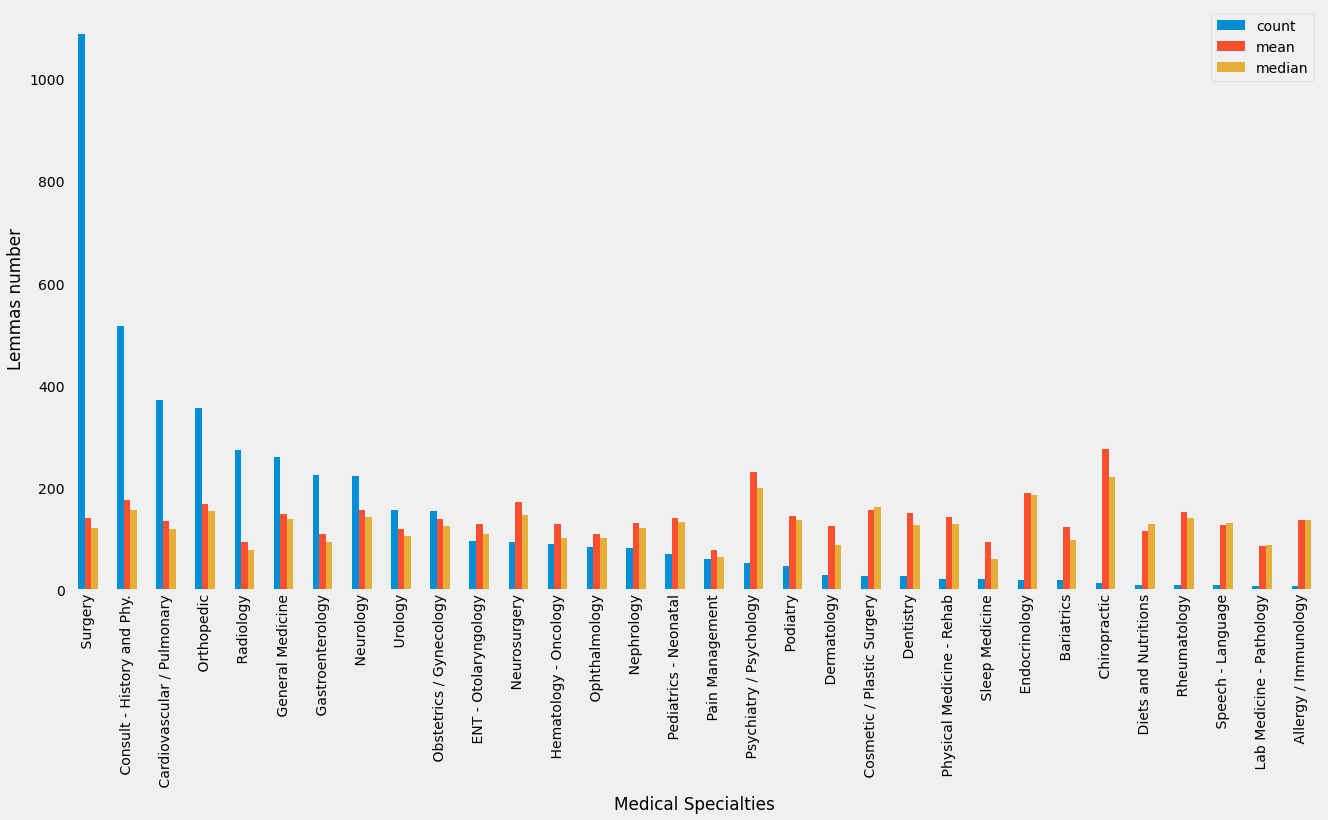

In [54]:
# A good snapshot: in our corpus there is a great number of texts for Surgery, but for practices like Psychiatry and 
#Immunology very few. Nonetheless, mean and median of tokes are high for those categories, which means that the corpora
#are long
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)

In [55]:
#Decided to group some categories in sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
# # Combining similar offenses together
data = data.replace({' Sleep Medicine': " Sleep and Pain", ' Pain Management': " Sleep and Pain"})
data

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"['subjective', 'this', '-year-old', 'white', '...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49,209
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"['-d', 'm-mode', 'left', 'atrial', 'enlargemen...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22,62
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221
...,...,...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262
4996,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396


In [56]:
# # Combining similar offenses together
#Group sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
data = data.replace({' Cosmetic / Plastic Surgery': " SKIN cosmetics", ' Dermatology': " SKIN cosmetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Dentistry                       27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language          

In [57]:
data = data.replace({' Chiropractic': " Physical Therapy", ' Physical Medicine - Rehab': " Physical Therapy"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dentistry                       27
 Endocrinology                   19
 Bariatrics                      18
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology   

In [58]:
data = data.replace({' Bariatrics': " Dietetics", ' Diets and Nutritions': " Dietetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology       

In [59]:
data = data.replace({' Neurology': " Neurologists", ' Neurosurgery': " Neurologists"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Neurologists                   317
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology             7
Name: medical_specialty, dty

In [60]:
# Final count of medical specialties (for now)
data = data.replace({' Lab Medicine - Pathology': " Pathology"})
data['medical_specialty'].nunique()

27

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4514 non-null   object
 1   medical_specialty  4514 non-null   object
 2   transcription      4514 non-null   object
 3   tokenized_sents    4514 non-null   object
 4   POSTags            4514 non-null   object
 5   Nouns              4514 non-null   object
 6   lemmatize          4514 non-null   object
 7   lemmatize_count    4514 non-null   int64 
 8   tokens             4514 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 512.7+ KB


In [62]:
#Setting a cutoff lowerbound (250 tokens) and upperbound (1000) for the number of Lemma
data = data[(data['lemmatize_count'] >= 60) & (data['lemmatize_count'] <= 250)]
print(data['lemmatize_count'].min())
print(data['lemmatize_count'].max())

60
250


In [63]:
data['medical_specialty'].nunique()

27

In [64]:
data['medical_specialty'].value_counts()

 Surgery                       818
 Consult - History and Phy.    396
 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Pediatrics - Neonatal          57
 SKIN cosmetics                 44
 Sleep and Pain                 41
 Psychiatry / Psychology        27
 Podiatry                       25
 Dentistry                      25
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [65]:
print(data['tokens'].min())
print(data['tokens'].max())

102
969


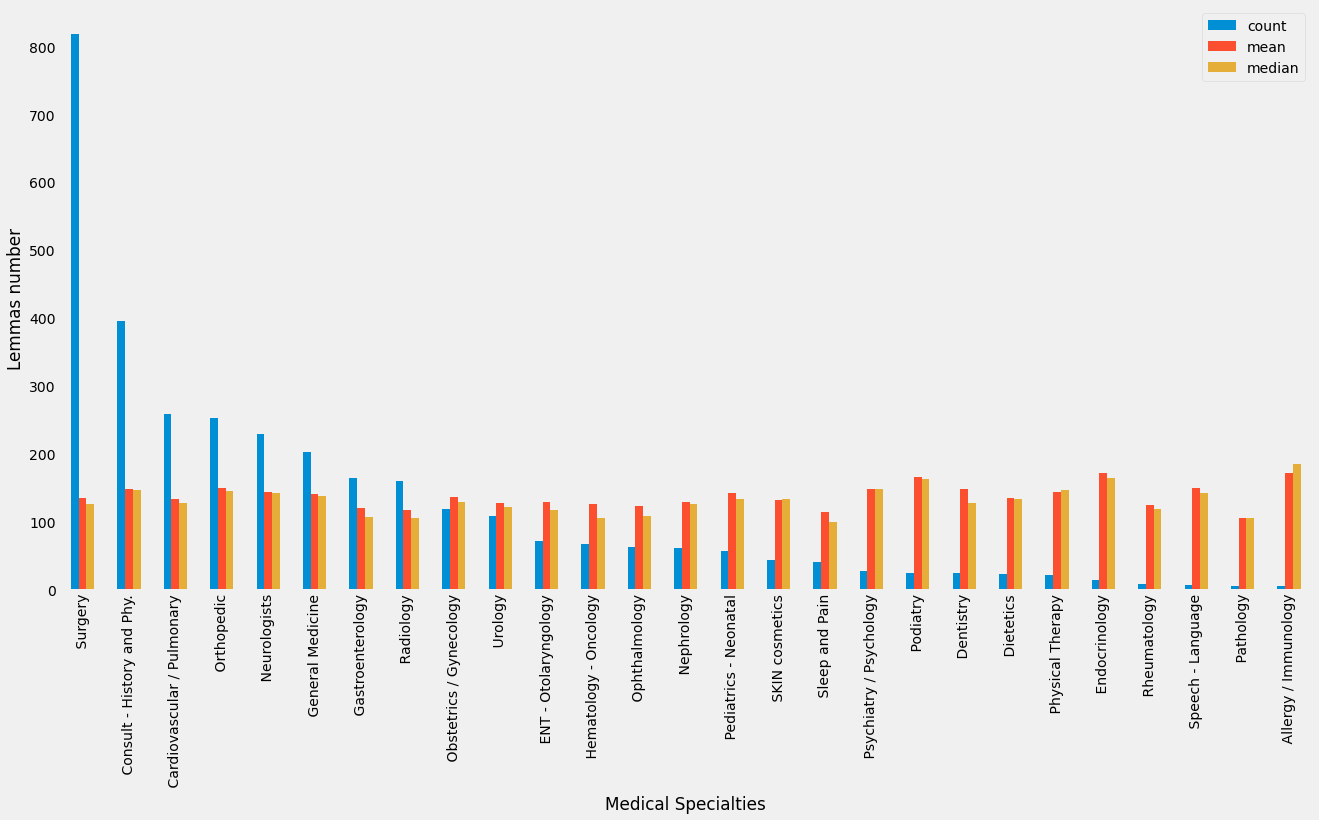

In [66]:
# Cleaned snapshot
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.savefig('Corpus_view_with_Lemmas')

In [67]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,818,135.386308,126.0
Consult - History and Phy.,396,148.037879,147.0
Cardiovascular / Pulmonary,259,133.853282,128.0
Orthopedic,253,149.221344,146.0
Neurologists,229,144.537118,142.0
General Medicine,203,141.103448,138.0
Gastroenterology,164,119.567073,107.0
Radiology,160,117.881250,105.0
Obstetrics / Gynecology,119,136.798319,129.0


In [68]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
1734,Cardiolite treadmill exercise stress test. T...,Radiology,cardiolite treadmill exercise stress test clin...,"['cardiolite', 'treadmill', 'exercise', 'stres...","[(cardiolite, NN), (treadmill, NN), (exercise,...","[(cardiolite, NN), (treadmill, NN), (exercise,...","[cardiolite, treadmill, exercise, stress, test...",67,193
4321,Local reaction secondary to insect sting. Pa...,Consult - History and Phy.,history of present illness patient is a -ye...,"['history', 'of', 'present', 'illness', 'patie...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (patient, NN), (male, NN), (wi...","[history, patient, male, wife, bee, hand, hand...",117,473
2400,"Cataract, right eye. Phacoemulsification wit...",Ophthalmology,preoperative diagnosis cataract right eye po...,"['preoperative', 'diagnosis', 'cataract', 'rig...","[(preoperative, JJ), (diagnosis, NN), (catarac...","[(diagnosis, NN), (cataract, NN), (eye, NN), (...","[diagnosis, cataract, eye, diagnosis, cataract...",90,298
4056,Nipple areolar reconstruction utilizing a ful...,SKIN cosmetics,preoperative diagnoses surgical absence of le...,"['preoperative', 'diagnoses', 'surgical', 'abs...","[(preoperative, JJ), (diagnoses, NNS), (surgic...","[(diagnoses, NNS), (absence, NN), (areola, NN)...","[diagnosis, absence, areola, history, breast, ...",179,610
2217,Hardware removal in the left elbow.,Orthopedic,preoperative diagnosis retained hardware in le...,"['preoperative', 'diagnosis', 'retained', 'har...","[(preoperative, JJ), (diagnosis, NN), (retaine...","[(diagnosis, NN), (hardware, NN), (elbow, NN),...","[diagnosis, hardware, elbow, diagnosis, hardwa...",121,365


In [69]:
# data['lemmatize'].astype('str')

In [70]:
# data['lemmatize_to_string']= data['lemmatize'].astype('str')
data['lemmatize_to_string']= data['lemmatize'].str.join(" ")
type(data['lemmatize_to_string'])

pandas.core.series.Series

In [71]:
data

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens,lemmatize_to_string
1,Consult for laparoscopic gastric bypass.,Dietetics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348,history difficulty stair difficulty airline se...
2,Consult for laparoscopic gastric bypass.,Dietetics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704,history illness i abc today gentleman year pou...
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221,left cavity size wall thickness wall motion fu...
5,Morbid obesity. Laparoscopic antecolic anteg...,Dietetics,preoperative diagnosis morbid obesity postope...,"['preoperative', 'diagnosis', 'morbid', 'obesi...","[(preoperative, JJ), (diagnosis, NN), (morbid,...","[(diagnosis, NN), (morbid, NN), (obesity, NN),...","[diagnosis, morbid, obesity, diagnosis, morbid...",231,719,diagnosis morbid obesity diagnosis morbid obes...
6,"Liposuction of the supraumbilical abdomen, re...",Dietetics,preoperative diagnoses deformity right breast...,"['preoperative', 'diagnoses', 'deformity', 'ri...","[(preoperative, JJ), (diagnoses, NNS), (deform...","[(diagnoses, NNS), (deformity, NN), (breast, N...","[diagnosis, deformity, breast, reconstruction,...",175,599,diagnosis deformity breast reconstruction tiss...
...,...,...,...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792,history i pleasure meeting patient today evalu...
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262,diagnosis kawasaki disease discharge diagnosis...
4996,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716,subjective female today physical asthma month ...
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396,complaint male present child hospital emergenc...


# Creating the Model

In [72]:
#Creating the label and Creating the Training and Test Datasets
#first thing to do is to separate out the label from the numerical dataframe
X = data.drop("medical_specialty", axis=1)
y = data["medical_specialty"]
#Imput is the X dataset. 
print(X.shape, y.shape)

(3277, 9) (3277,)


In [73]:
X

,description,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens,lemmatize_to_string
1,Consult for laparoscopic gastric bypass.,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348,history difficulty stair difficulty airline se...
2,Consult for laparoscopic gastric bypass.,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704,history illness i abc today gentleman year pou...
4,2-D Echocardiogram,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221,left cavity size wall thickness wall motion fu...
5,Morbid obesity. Laparoscopic antecolic anteg...,preoperative diagnosis morbid obesity postope...,"['preoperative', 'diagnosis', 'morbid', 'obesi...","[(preoperative, JJ), (diagnosis, NN), (morbid,...","[(diagnosis, NN), (morbid, NN), (obesity, NN),...","[diagnosis, morbid, obesity, diagnosis, morbid...",231,719,diagnosis morbid obesity diagnosis morbid obes...
6,"Liposuction of the supraumbilical abdomen, re...",preoperative diagnoses deformity right breast...,"['preoperative', 'diagnoses', 'deformity', 'ri...","[(preoperative, JJ), (diagnoses, NNS), (deform...","[(diagnoses, NNS), (deformity, NN), (breast, N...","[diagnosis, deformity, breast, reconstruction,...",175,599,diagnosis deformity breast reconstruction tiss...
...,...,...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792,history i pleasure meeting patient today evalu...
4995,This is a 14-month-old baby boy Caucasian who...,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262,diagnosis kawasaki disease discharge diagnosis...
4996,A female for a complete physical and follow u...,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716,subjective female today physical asthma month ...
4997,Mother states he has been wheezing and coughing.,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396,complaint male present child hospital emergenc...


In [74]:
y.nunique()

27

In [75]:
y.unique()

array([' Dietetics', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Dentistry', ' Urology', ' General Medicine', ' Surgery',
       ' Speech - Language', ' Sleep and Pain', ' Rheumatology',
       ' Radiology', ' Psychiatry / Psychology', ' Podiatry',
       ' Physical Therapy', ' Pediatrics - Neonatal', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Pathology', ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Endocrinology', ' SKIN cosmetics',
       ' Consult - History and Phy.', ' Allergy / Immunology'],
      dtype=object)

In [76]:
# Import the necessaried dependecies 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [77]:
#We imports the module for creating training and test data sets.
from sklearn.model_selection import train_test_split

#The third line creates the training (X_train, y_train) and test set (X-test, y_test) arrays,  The 'random_state' argument ensures that the results are reproducible.
X_train, X_test, y_train, y_test = train_test_split(data['lemmatize_to_string'], y, stratify=y, test_size=0.30, random_state=100)

#The fourth line prints the shape of the overall, training and test dataset, respectively.
print(data.shape); print(X_train.shape); print(X_test.shape)

(3277, 10)
(2293,)
(984,)


In [78]:
X_train

806     diagnosis space infection tooth diagnosis spac...
3394    complaint pain history illness male kid juveni...
2636    diagnosis hypermenorrhea diagnosis hypermenorr...
1201    diagnosis erythema knee leg knee diagnosis ery...
1996    nerve root block preprocedure preparation risk...
                              ...                        
181     diagnosis axilla abdomen vascular graft diabet...
928     diagnosis wrist tenosynovitis diagnosis wrist ...
36      diagnosis bladder tumor diagnosis bladder tumo...
3772    diagnosis cleft lip cleft palate cleft lip cle...
4491    history patient male evaluation request dr x j...
Name: lemmatize_to_string, Length: 2293, dtype: object

In [79]:
X_test

2915    exam ct head contrast ct bone contrast spine c...
2240    diagnosis av head discharge diagnosis av head ...
3081    history patient female history colectomy adeno...
2594    diagnosis endometrium therapy adnexal cyst dia...
2932    cc headache hxthis y/o rhf health evening / / ...
                              ...                        
2783    reason visit patient woman pseudotumor cerebri...
495     diagnosis fracture distal radius tunnel diagno...
4582    history illness male health maintenance examin...
3313    patient female clinic today recheck type ii hy...
2629    delivery note gp lmp care complaining contract...
Name: lemmatize_to_string, Length: 984, dtype: object

In [80]:
y_train

806                         Surgery
3394               General Medicine
2636        Obstetrics / Gynecology
1201                        Surgery
1996                 Sleep and Pain
                   ...             
181                         Surgery
928                         Surgery
36                          Urology
3772           ENT - Otolaryngology
4491     Consult - History and Phy.
Name: medical_specialty, Length: 2293, dtype: object

In [81]:
y_test

2915                   Neurologists
2240                     Orthopedic
3081                      Pathology
2594        Obstetrics / Gynecology
2932                   Neurologists
                   ...             
2783                   Neurologists
495                         Surgery
4582     Consult - History and Phy.
3313               General Medicine
2629        Obstetrics / Gynecology
Name: medical_specialty, Length: 984, dtype: object

# Converting Text to Word Frequency Vectors with TfidfVectorizer.

We have processed the text, but we need to convert it to word frequency vectors for building machine learning models. There are several ways to do this, such as using CountVectorizer and HashingVectorizer, but the TfidfVectorizer is the most popular one.

In [82]:
# TF-IDF is an acronym that stands for 'Term Frequency-Inverse Document Frequency'. 
#It is used as a weighting factor in text mining applications.

# Term Frequency (TF): This summarizes the normalized Term Frequency within a document.

# Inverse Document Frequency (IDF): This reduces the weight of terms that appear a lot across documents. 

#In simple terms, TF-IDF attempts to highlight important words which are frequent in a document but not across documents. 
#We will work on creating TF-IDF vectors for our documents.

In [83]:
# The first line of code below imports the TfidfVectorizer from 'sklearn.feature_extraction.text' module
from sklearn.feature_extraction.text import TfidfVectorizer

# The second line initializes the TfidfVectorizer object, called 'vectorizer_tfidf
vectorizer_tfidf = TfidfVectorizer()

# The third line fits and transforms the training data.
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

# The fourth line of code transforms the test data, while the fifth line prints the first 10 features.
test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['__', '___', '____', '_____', '______', '_______', 'aand', 'ab', 'abbott', 'abc']


In [84]:
print(train_tfIdf)

  (0, 6710)	0.03656832594440852
  (0, 1870)	0.05575762651405086
  (0, 8291)	0.05022992222813839
  (0, 9097)	0.04045540478327813
  (0, 8284)	0.04886303615687232
  (0, 8580)	0.08935631072869066
  (0, 8513)	0.0643223839752145
  (0, 7935)	0.05013424299642578
  (0, 2622)	0.04731350181227723
  (0, 5802)	0.06592663987564022
  (0, 4634)	0.04827071197181241
  (0, 8416)	0.05437152080989547
  (0, 3368)	0.047236791178765204
  (0, 5676)	0.08605005923208613
  (0, 936)	0.04545142246616166
  (0, 5832)	0.03670501118821031
  (0, 6222)	0.1095444743192231
  (0, 8807)	0.10183979895294647
  (0, 6109)	0.05154155069771299
  (0, 8152)	0.04399870478995953
  (0, 625)	0.03915178108205082
  (0, 296)	0.04040980391830515
  (0, 7963)	0.11266907872254556
  (0, 5213)	0.08935631072869066
  (0, 974)	0.05532624897029625
  :	:
  (2292, 8564)	0.027840725707167613
  (2292, 7501)	0.029740915074971168
  (2292, 3883)	0.0620241066708668
  (2292, 6233)	0.04350209862430861
  (2292, 9097)	0.034435911917700256
  (2292, 5802)	0.05611

In [85]:
# [np.array(X_train[i]) for i in X_train.index]

In [86]:
# # The first line of code below imports the TfidfVectorizer from 'sklearn.feature_extraction.text' module
# from sklearn.feature_extraction.text import TfidfVectorizer

# # The second line initializes the TfidfVectorizer object, called 'vectorizer_tfidf
# vectorizer_tfidf = TfidfVectorizer()

# # The third line fits and transforms the training data.
# train_tfIdf = vectorizer_tfidf.fit_transform([np.array(X_train[i]) for i in X_train.index])

# # The fourth line of code transforms the test data, while the fifth line prints the first 10 features.
# test_tfIdf = vectorizer_tfidf.transform([np.array(X_test[i]) for i in X_test.index])

# print(vectorizer_tfidf.get_feature_names()[:10])

In [87]:
# Let's look at the shape of the transformed TF-IDF train and test datasets. 
# The following line of code performs this task.
print(train_tfIdf.shape); print(test_tfIdf.shape)

(2293, 9736)
(984, 9736)


In [88]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# The fourth line of code fits the classifier on the training data
nb_classifier.fit(train_tfIdf, y_train)

# our model is trained and it is ready to generate predictions on the unseen data. 
# This is performed in the fifth line of code, while the sixth line prints the predicted class for the first 10 records in the test data.
pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])

[' Surgery' ' Surgery' ' Surgery' ' Surgery' ' Neurologists' ' Surgery'
 ' Surgery' ' Surgery' ' Surgery' ' Consult - History and Phy.']


In [89]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [' Surgery' ' Surgery' ' Surgery' ' Surgery' ' Neurologists' ' Surgery'
 ' Surgery' ' Surgery' ' Surgery' ' Consult - History and Phy.']
Actual Labels: [' Neurologists', ' Orthopedic', ' Pathology', ' Obstetrics / Gynecology', ' Neurologists', ' Hematology - Oncology', ' Surgery', ' Neurologists', ' Endocrinology', ' Neurologists']


In [90]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

,Prediction,Actual
0,Surgery,Neurologists
1,Surgery,Orthopedic
2,Surgery,Pathology
3,Surgery,Obstetrics / Gynecology
4,Neurologists,Neurologists
5,Surgery,Hematology - Oncology
6,Surgery,Surgery
7,Surgery,Neurologists
8,Surgery,Endocrinology
9,Consult - History and Phy.,Neurologists


In [91]:
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2)
print(Conf_metrics_tfidf)

0.3790650406504065
[[  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   5  26   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0  46   0]
 [  0   0 111   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0
    0   0   0   0   0   0   0   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   8   0]
 [  0   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   0]
 [  0   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  16   0]
 [  0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   0]
 [  0   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  34   0]
 [  0   0  58   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred2)

array([[  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   5,  26,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  46,
          0],
       [  0,   0, 111,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,
          0],
       [  0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0],
       [  0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,
          0],
       [  0,   0,   3,   0,   0,   0,   

In [93]:
labels= [' Dietetics', ' Neurologists', ' Dentistry',
       ' Cardiovascular / Pulmonary', ' Urology', ' General Medicine',
       ' Surgery', ' Speech - Language', ' Sleep and Pain',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Therapy', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Nephrology', ' Pathology', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' SKIN cosmetics', ' Consult - History and Phy.',
       ' Allergy / Immunology']

In [94]:
print(818/3277) #Baseline accuracy: It is calculated as the number of times the majority class (i.e., 'Surgery') appears in the target variable, divided by the total number of observations.

0.24961855355508086


In [95]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2,
                            target_names=labels))

                             precision    recall  f1-score   support

                  Dietetics       0.00      0.00      0.00         1
               Neurologists       0.38      0.06      0.11        78
                  Dentistry       0.32      0.93      0.48       119
 Cardiovascular / Pulmonary       0.00      0.00      0.00         8
                    Urology       0.00      0.00      0.00         7
           General Medicine       0.00      0.00      0.00        22
                    Surgery       0.00      0.00      0.00         4
          Speech - Language       0.00      0.00      0.00        49
             Sleep and Pain       0.00      0.00      0.00        61
               Rheumatology       0.00      0.00      0.00        20
                  Radiology       0.00      0.00      0.00        18
    Psychiatry / Psychology       0.29      0.12      0.16        69
                   Podiatry       0.00      0.00      0.00        36
           Physical Therapy      

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 100)

rf=classifier.fit(train_tfIdf, y_train)
rf.score(test_tfIdf, y_test)

0.1290650406504065

In [97]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF)
print(Conf_metrics_RF)

[' Orthopedic' ' Surgery' ' Cardiovascular / Pulmonary' ' Surgery'
 ' Radiology' ' Obstetrics / Gynecology' ' Surgery' ' Surgery' ' Surgery'
 ' Consult - History and Phy.']
0.1290650406504065
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  5 18  0  0  0  0  0  4  0  0  0  0  0  0  1  2  0  0  0 11  0  0  0
   0 37  0]
 [ 1  9 30  1  5  2  1  4 19  4  4  8  0  0  7  0  9  0  0  9  0  1  0  0
   0  1  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  8  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0
   0 16  0]
 [ 0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0]
 [ 0  0 12  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  5  0  0  0
   0 31  0]
 [ 0  3 48  0  0  0  0  0  3  0  0  0  0  0  0  0  2  0  0  0  0  0  0  1
   0  4  0]
 [ 0  1 12  0  0  0  0  0  1  0  0

In [98]:
labels= [' Dietetics', ' Neurologists', ' Dentistry',
       ' Cardiovascular / Pulmonary', ' Urology', ' General Medicine',
       ' Surgery', ' Speech - Language', ' Sleep and Pain',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Therapy', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Nephrology', ' Pathology', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' SKIN cosmetics', ' Consult - History and Phy.',
       ' Allergy / Immunology']

In [99]:
# We can sort the features by their importance. Which feature is more importance for the prediction. 
sorted(zip(rf.feature_importances_, labels), reverse=True)

[(0.006797697777686378, ' Physical Therapy'),
 (0.0004020245770423837, ' Rheumatology'),
 (0.00011235549162803317, ' Radiology'),
 (9.116942740387612e-05, ' Dietetics'),
 (8.423683118677041e-05, ' Nephrology'),
 (5.294437494964575e-05, ' Pathology'),
 (4.2271264725211325e-05, ' Neurologists'),
 (2.9218307756392013e-05, ' Gastroenterology'),
 (2.826850648546668e-05, ' General Medicine'),
 (2.23211642184413e-05, ' Dentistry'),
 (2.0448694677383242e-05, ' Orthopedic'),
 (1.7848783207141898e-05, ' ENT - Otolaryngology'),
 (1.5940699821409427e-05, ' Cardiovascular / Pulmonary'),
 (1.422663637136713e-05, ' Urology'),
 (1.1553405406140227e-05, ' Ophthalmology'),
 (9.358248730312516e-06, ' Sleep and Pain'),
 (6.980332077168558e-06, ' Surgery'),
 (5.437721738672818e-06, ' SKIN cosmetics'),
 (5.02649911652727e-06, ' Psychiatry / Psychology'),
 (4.177143506731821e-06, ' Podiatry'),
 (3.304244896591688e-06, ' Pediatrics - Neonatal'),
 (3.1569460449350265e-06, ' Obstetrics / Gynecology'),
 (2.59744

In [100]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predRF,
                            target_names=labels))

                             precision    recall  f1-score   support

                  Dietetics       0.00      0.00      0.00         1
               Neurologists       0.09      0.06      0.07        78
                  Dentistry       0.14      0.25      0.18       119
 Cardiovascular / Pulmonary       0.00      0.00      0.00         8
                    Urology       0.00      0.00      0.00         7
           General Medicine       0.00      0.00      0.00        22
                    Surgery       0.00      0.00      0.00         4
          Speech - Language       0.00      0.00      0.00        49
             Sleep and Pain       0.10      0.05      0.07        61
               Rheumatology       0.00      0.00      0.00        20
                  Radiology       0.00      0.00      0.00        18
    Psychiatry / Psychology       0.13      0.09      0.10        69
                   Podiatry       0.00      0.00      0.00        36
           Physical Therapy      

In [101]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [' Surgery' ' Surgery' ' Surgery' ' Surgery' ' Neurologists' ' Surgery'
 ' Surgery' ' Surgery' ' Surgery' ' Consult - History and Phy.']
Actual Labels: [' Neurologists', ' Orthopedic', ' Pathology', ' Obstetrics / Gynecology', ' Neurologists', ' Hematology - Oncology', ' Surgery', ' Neurologists', ' Endocrinology', ' Neurologists']


In [102]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

,Prediction,Actual
0,Surgery,Neurologists
1,Surgery,Orthopedic
2,Surgery,Pathology
3,Surgery,Obstetrics / Gynecology
4,Neurologists,Neurologists
5,Surgery,Hematology - Oncology
6,Surgery,Surgery
7,Surgery,Neurologists
8,Surgery,Endocrinology
9,Consult - History and Phy.,Neurologists


In [103]:
# Create the GridSearchCV model
# Create first pipeline for base without reducing features.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])
# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,40)),
    'classifier__max_features' : list(range(6,32,10))}
]
# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# Fit on data
# Train the models with GridSearch
best_clf = clf.fit(train_tfIdf, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  5.8min finished


In [104]:
print(best_clf.best_params_)
print(best_clf.best_score_)

{'classifier': LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear'), 'classifier__C': 0.615848211066026, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.3715643462625225


In [105]:
import seaborn as sns
import gc
from sklearn.decomposition import PCA

In [106]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(data['transcription'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
print(feature_names)


['abc', 'abcd', 'abdomen', 'abdomen soft', 'abdomen soft nontender', 'abdominal', 'abdominal pain', 'able', 'abnormal', 'abnormalities', 'abscess', 'achieved', 'active', 'activity', 'acute', 'acute distress', 'additional', 'adenopathy', 'adequate', 'adhesions', 'administered', 'admission', 'admitted', 'advanced', 'age', 'ago', 'air', 'alcohol', 'alert', 'alert oriented', 'allergies', 'allergies known', 'alternatives', 'anastomosis', 'anemia', 'anesthesia', 'anesthesia general', 'anesthesia general endotracheal', 'anesthetic', 'ankle', 'anterior', 'anterior chamber', 'anteriorly', 'antibiotic', 'antibiotics', 'aorta', 'aortic', 'apparent', 'appear', 'appearance', 'appeared', 'appearing', 'appears', 'applied', 'applied patient', 'appropriate', 'approximated', 'approximately', 'approximately cm', 'area', 'areas', 'arm', 'artery', 'artery disease', 'aspect', 'aspiration', 'aspirin', 'assessment', 'associated', 'atrial', 'attention', 'attention turned', 'auscultation', 'awakened', 'away', '

In [107]:
gc.collect()
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)   


In [108]:
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_test_pred= clf.predict(X_test)

labels = category_list
cm = confusion_matrix(y_test, y_test_pred, labels)


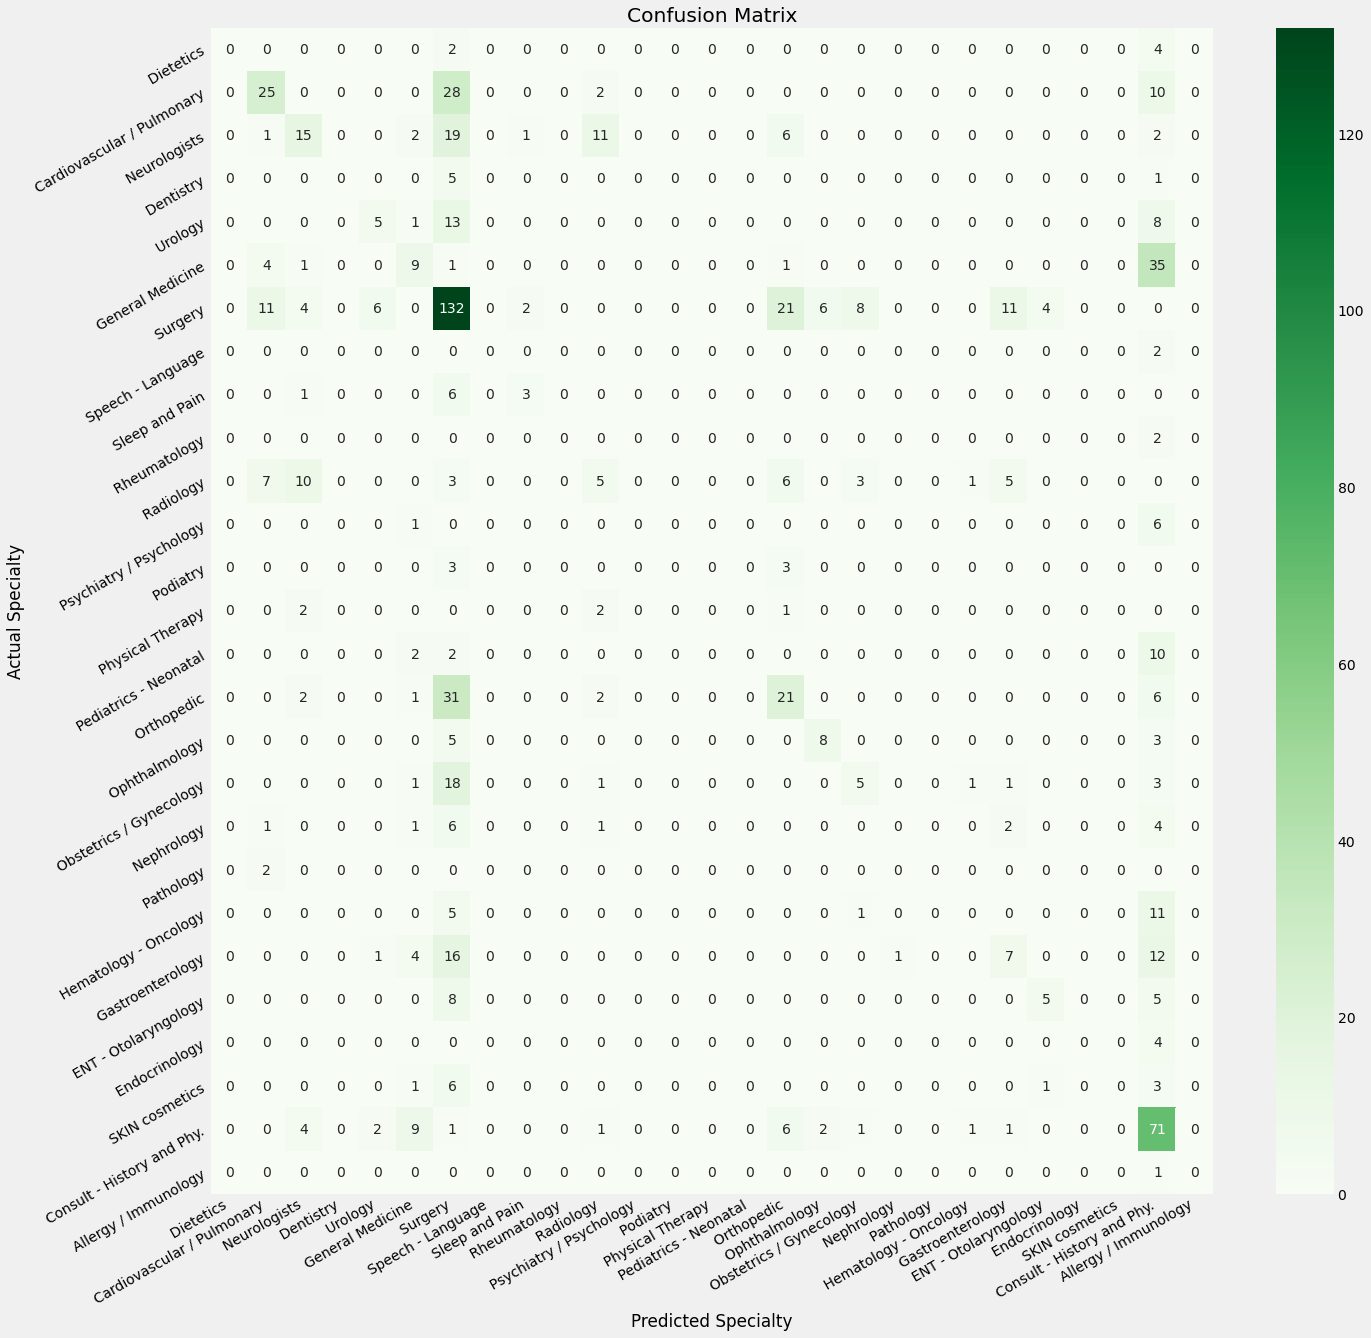

In [109]:
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

ax.set_xlabel('Predicted Specialty');ax.set_ylabel('Actual Specialty'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')    
plt.savefig("plots/confusion_matrix_without_reduction")
plt.show()